In [1]:
import pandas as pd
import numpy as np
import sklearn
import scipy.stats as stats
from scipy.stats import skew, kurtosis
from scipy.stats import describe
from scipy.stats import norm
from scipy.stats import kurtosis
from scipy.stats import t
from scipy.stats import multivariate_normal
from scipy.stats import spearmanr
from scipy.stats import multivariate_t
from scipy.integrate import quad
from scipy.stats.mstats import gmean
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.linalg
import pprint as pprint
import time as time
from sklearn.decomposition import PCA
from numpy.linalg import eig
from math import sqrt, pi, log, e
from enum import Enum


In [2]:
import QuantRiskTools as QRT

In [18]:
###########################################################################################################################################
#                                PROBLEM 1
#  f47b793582b5766a1020d1efc45f9e67cc365f98
########################################################################################################################################

problem1_data = pd.read_csv("problem1.csv")



In [19]:
#look for missing data and fill in with mean

problem1_data.isnull().sum()



Price1    2
Price2    2
Price3    2
Date      0
dtype: int64

In [20]:
# problem1_data = problem1_data.fillna(problem1_data.mean())

In [21]:
problem1_data

#Index problem 1_data by Date

problem1_data = problem1_data.set_index('Date')



In [22]:
problem1_data

,Price1,Price2,Price3
Date,,,
2023-04-12,100.677355,95.623608,110.277651
2023-04-13,101.198944,96.076402,110.134629
2023-04-14,100.998675,95.647828,109.862264
2023-04-15,NaN,97.224251,110.731093
2023-04-16,100.764738,93.810114,109.103059
2023-04-17,101.216841,97.894091,110.303287
2023-04-18,100.878121,94.882713,109.321095
2023-04-19,101.282651,96.636828,110.105073
2023-04-20,100.976493,94.655191,110.226220


In [23]:
#reset index

problem1_data = problem1_data.reset_index()

In [24]:
problem1_data


,Date,Price1,Price2,Price3
0,2023-04-12,100.677355,95.623608,110.277651
1,2023-04-13,101.198944,96.076402,110.134629
2,2023-04-14,100.998675,95.647828,109.862264
3,2023-04-15,NaN,97.224251,110.731093
4,2023-04-16,100.764738,93.810114,109.103059
5,2023-04-17,101.216841,97.894091,110.303287
6,2023-04-18,100.878121,94.882713,109.321095
7,2023-04-19,101.282651,96.636828,110.105073
8,2023-04-20,100.976493,94.655191,110.226220
9,2023-04-21,101.095627,95.915128,110.455452


In [25]:


problem1_returns = QRT.calculateReturns(problem1_data,"Geometric")


TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [ ]:
problem1_returns

,Price1,Price2,Price3
Date,,,
2023-04-13,0.005181,0.004735,-0.001297
2023-04-14,0.003192,0.000253,-0.003767
2023-04-17,0.007693,0.023744,0.000232
2023-04-18,0.004320,-0.007748,-0.008674
2023-04-19,0.008348,0.010596,-0.001565
2023-04-20,0.005300,-0.010127,-0.000466
2023-04-21,0.006486,0.003049,0.001612
2023-04-22,0.003842,-0.004029,0.001348
2023-04-23,0.003596,-0.003246,-0.009151


In [ ]:
#take problem1_returns and write to CSV 

problem1_returns.to_csv("problem1_returns.csv",index=False)

#calculate pairwise Covariance

problem1_covariance = problem1_returns.cov()


In [ ]:
problem1_covariance

,Price1,Price2,Price3
Price1,0.000003,0.000011,0.000003
Price2,0.000011,0.000082,0.000011
Price3,0.000003,0.000011,0.000012


In [ ]:
problem1_covariance.to_csv("problem1_covariance.csv",index = False)

In [ ]:
def is_pos_semidef(matrix):
    eig_vals = np.linalg.eigvals(matrix)
    return all(eig_vals >= 0)

is_pos_semidef(problem1_covariance)

True

In [ ]:
###########################################################################################################################################
#                                PROBLEM 2
#
########################################################################################################################################


# My BSM Model

class BSMerton(object):
    def __init__(self, args):
        self.Type = int(args[0])  # 1 for a Call, - 1 for a put
        self.S = float(args[1])  # Underlying asset price
        self.K = float(args[2])  # Option strike K
        self.r = float(args[3])  # Continuous risk fee rate
        self.q = float(args[4])  # Dividend continuous rate
        self.T = float(args[5]) / 255.0  # Compute time to expiry
        self.sigma = float(args[6])  # Underlying volatility
        self.sigmaT = self.sigma * self.T ** 0.5  # sigma*T for reusability
        self.d1 = (log(self.S / self.K) + \
                   (self.r - self.q + 0.5 * (self.sigma ** 2)) \
                   * self.T) / self.sigmaT
        self.d2 = self.d1 - self.sigmaT
        [self.Premium] = self.premium()
        [self.Delta] = self.delta()
        [self.Theta] = self.theta()
        [self.Rho] = self.rho()
        [self.Vega] = self.vega()
        [self.Gamma] = self.gamma()
        [self.Phi] = self.phi()
        [self.Charm] = self.dDeltadTime()
        [self.Vanna] = self.dDeltadVol()

    def premium(self):
        tmpprem = self.Type * (self.S * e ** (-self.q * self.T) * norm.cdf(self.Type * self.d1) - \
                               self.K * e ** (-self.r * self.T) * norm.cdf(self.Type * self.d2))
        return [tmpprem]

    ############################################
    ############ 1st order greeks ##############
    ############################################

    def delta(self):
        dfq = e ** (-self.q * self.T)
        if self.Type == 1:
            return [dfq * norm.cdf(self.d1)]
        else:
            return [dfq * (norm.cdf(self.d1) - 1)]

    # Vega for 1% change in vol
    def vega(self):
        return [0.01 * self.S * e ** (-self.q * self.T) * \
                norm.pdf(self.d1) * self.T ** 0.5]

    # Theta for 1 day change
    def theta(self):
        df = e ** -(self.r * self.T)
        dfq = e ** (-self.q * self.T)
        tmptheta = (1.0 / 365.0) \
                   * (-0.5 * self.S * dfq * norm.pdf(self.d1) * \
                      self.sigma / (self.T ** 0.5) + \
                      self.Type * (self.q * self.S * dfq * norm.cdf(self.Type * self.d1) \
                                   - self.r * self.K * df * norm.cdf(self.Type * self.d2)))
        return [tmptheta]

    def rho(self):
        df = e ** -(self.r * self.T)
        return [self.Type * self.K * self.T * df * 0.01 * norm.cdf(self.Type * self.d2)]

    def phi(self):
        return [0.01 * -self.Type * self.T * self.S * \
                e ** (-self.q * self.T) * norm.cdf(self.Type * self.d1)]

    ############################################
    ############ 2nd order greeks ##############
    ############################################

    def gamma(self):
        return [e ** (-self.q * self.T) * norm.pdf(self.d1) / (self.S * self.sigmaT)]

    # Charm for 1 day change
    def dDeltadTime(self):
        dfq = e ** (-self.q * self.T)
        if self.Type == 1:
            return [
                (1.0 / 365.0) * -dfq * (norm.pdf(self.d1) * ((self.r - self.q) / (self.sigmaT) - self.d2 / (2 * self.T)) \
                                        + (-self.q) * norm.cdf(self.d1))]
        else:
            return [
                (1.0 / 365.0) * -dfq * (norm.pdf(self.d1) * ((self.r - self.q) / (self.sigmaT) - self.d2 / (2 * self.T)) \
                                        + self.q * norm.cdf(-self.d1))]

    # Vanna for 1% change in vol
    def dDeltadVol(self):
        return [0.01 * -e ** (-self.q * self.T) * self.d2 / self.sigma * norm.pdf(self.d1)]

    # Vomma
    def dVegadVol(self):
        return [0.01 * -e ** (-self.q * self.T) * self.d2 / self.sigma * norm.pdf(self.d1)]

In [ ]:
# values generated for problem 2
# Underlying 102.80552422109311
# Strike 104.09381517694352
#  IV .22
# rf = .045
# div = 0.05362280617571992

OptionCall = [1, 102.80552422109311, 104.09381517694352, .045, 0.05362280617571992, 168.0, 0.22]

Option_Call_Premium = BSMerton(OptionCall).Premium
Option_Call_Delta = BSMerton(OptionCall).Delta
Option_Call_Gamma = BSMerton(OptionCall).Gamma
Option_Call_Theta = BSMerton(OptionCall).Theta
Option_Call_Vega = BSMerton(OptionCall).Vega
Option_Call_Rho = BSMerton(OptionCall).Rho


Option_Call_Premium_Value = "Option_Call_Premium_Value "
Option_Call_Delta_Exposure = "Option_Call Delta Exposure: "
Option_Call_Gamma_Exposure = "Option_Call Gamma Exposure: "
Option_Call_Theta_Exposure = "Option_Call Theta Exposure: "
Option_Call_Vega_Exposure = "Option_Call Vega Exposure: "
Option_Call_Rho_Exposure = "Option_Call Rho Exposure: "


In [ ]:
print(Option_Call_Premium_Value, Option_Call_Premium)
print(Option_Call_Delta_Exposure,Option_Call_Delta)
print(Option_Call_Gamma_Exposure,Option_Call_Gamma)
print(Option_Call_Theta_Exposure,Option_Call_Theta)
print(Option_Call_Vega_Exposure,Option_Call_Vega)
print(Option_Call_Rho_Exposure,Option_Call_Rho)


Option_Call_Premium_Value  6.253355734071846
Option_Call Delta Exposure:  0.4779198246134956
Option_Call Gamma Exposure:  0.02097543398676515
Option_Call Theta Exposure:  -0.012766593627279296
Option_Call Vega Exposure:  0.3213184336979269
Option_Call Rho Exposure:  0.2824998556205177


In [ ]:
# simulate_prices

Stock_Price_sim = QRT.simulate_arithmetic_motion(102.80552422109311,0.22,1000)

expect (u, sigma, skew, kurt) = (102.80552422109311, 0.22, 0, 0)
(103.21550071556054, 22.55094763639082, -0.05952447144645128, -0.09012787639164843)


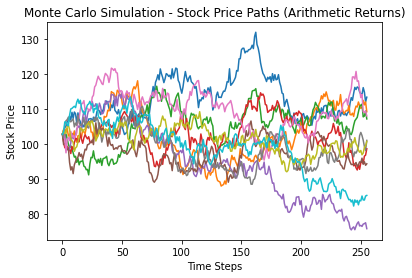

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 102.80552422109311
r = .045
sigma = 0.22
T = 1
N = 10000
M = 255

dt = T / M
expected_return = r

# Monte Carlo simulation
stock_prices = np.zeros((M + 1, N))
stock_prices[0] = S0

for t in range(1, M + 1):
    Z = np.random.standard_normal(N)
    stock_prices[t] = stock_prices[t - 1] + stock_prices[t - 1] * (expected_return * dt + sigma * np.sqrt(dt) * Z)

# Plot some example paths
plt.plot(stock_prices[:, :10])
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('Monte Carlo Simulation - Stock Price Paths (Arithmetic Returns)')
plt.show()

# Calculate and analyze the results
final_prices = stock_prices[-1]
mean_price = np.mean(final_prices)
median_price = np.median(final_prices)
# Add other relevant statistics as needed


In [ ]:
###########################################################################################################################################
#                                PROBLEM 3
#
########################################################################################################################################

prob_3_covariance = pd.read_csv("problem3_cov.csv")
prob_3_Expected_Returns = pd.read_csv("problem3_ER.csv")

In [ ]:
prob_3_covariance

,Asset1,Asset2,Asset3
0,0.042872,0.013500,0.014081
1,0.013500,0.044234,0.014303
2,0.014081,0.014303,0.048123


In [ ]:
prob_3_covariance

,Asset1,Asset2,Asset3
0,0.042872,0.013500,0.014081
1,0.013500,0.044234,0.014303
2,0.014081,0.014303,0.048123


In [ ]:
prob_3_Expected_Returns

,RF,Expected_Value_1,Expected_Value_2,Expected_Value_3
0,0.045,0.180091,0.18222,0.188126


In [ ]:
# Drop RF column

prob_3_Expected_Returns = prob_3_Expected_Returns.drop(columns=['RF'])

In [ ]:
#make the panda dataframe of covariance into an np.array

prob_3_covariance = prob_3_covariance.to_numpy()


In [ ]:
prob_3_covariance

array([[0.04287157, 0.01349965, 0.01408072],
       [0.01349965, 0.0442336 , 0.01430264],
       [0.01408072, 0.01430264, 0.04812348]])

In [ ]:
prob_3_Expected_Returns

,Expected_Value_1,Expected_Value_2,Expected_Value_3
0,0.180091,0.18222,0.188126


In [ ]:
prob_3_Expected_Returns = prob_3_Expected_Returns.to_numpy()

In [ ]:
risk_free = 0.045

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def optimize_risk(R, covar, er):
    # R: target return
    # covar: covariance matrix
    # er: expected returns vector

    n = len(er)

    def objective(w):
        return w.T @ covar @ w

    def constraint1(w):
        return np.sum(w) - 1.0

    def constraint2(w):
        return np.dot(w, er) - R

    w0 = np.ones(n) / n  # Initial weights
    bounds = [(0, 1) for _ in range(n)]  # Bounds for weights
    constraints = [
        {"type": "eq", "fun": constraint1},
        {"type": "eq", "fun": constraint2}
    ]

    result = minimize(objective, w0, bounds=bounds, constraints=constraints)

    # Return the objective (risk) and the portfolio weights
    return {"risk": result.fun, "weights": result.x, "R": R}

#Data manually added in
covar = np.array([[0.04287157, 0.01349965, 0.01408072],
                  [0.01349965, 0.0442336 , 0.01430264],
                  [0.01408072, 0.01430264, 0.04812348]])
er = np.array([0.1800909, 0.18222003, 0.18812645])

min_return = er.min()
max_return = er.max()
step_size = 0.0001

returns = np.arange(min_return, max_return + step_size, step_size)
optim_portfolios = pd.DataFrame([optimize_risk(R, covar, er) for R in returns])

# Plot the Efficient Frontier
# plt.plot(np.sqrt(optim_portfolios["risk"]), optim_portfolios["R"], label="Efficient Frontier")
# plt.xlabel("Risk - SD")
# plt.ylabel("Portfolio Expected Return")
# plt.legend(loc="bottomright")
# plt.show()

# Calculate Sharpe Ratios
rf = 0.045  # Risk-free rate
optim_portfolios["SR"] = (optim_portfolios["R"] - rf) / np.sqrt(optim_portfolios["risk"])

# Find the portfolio with the maximum Sharpe Ratio
maxSR = optim_portfolios["SR"].idxmax()
maxSR_ret = optim_portfolios["R"].iloc[maxSR]

maxSR_risk = np.sqrt(optim_portfolios["risk"].iloc[maxSR])

print("Maximum Sharpe Ratio Portfolio:")
print(f"Return: {maxSR_ret}, Risk: {maxSR_risk}, Sharpe Ratio: {optim_portfolios['SR'].iloc[maxSR]}")


Maximum Sharpe Ratio Portfolio:
Return: 0.18339089999999963, Risk: 0.1558702756736018, Sharpe Ratio: 0.887859467765332


In [ ]:
def risk_parity(covar, initial_weights=None):
    num_assets = len(covar)
    
    def objective(w):
        risk_contrib = w * (covar @ w)
        return np.sum((risk_contrib - risk_contrib.mean())**2)
    
    if initial_weights is None:
        initial_weights = np.array([1 / num_assets] * num_assets)
    bounds = [(0, 1) for _ in range(num_assets)]
    
    def constraint_sum(w):
        return np.sum(w) - 1

    constraints = {'type': 'eq', 'fun': constraint_sum}
    
    result = minimize(objective, initial_weights, constraints=constraints, bounds=bounds)
    return result.x


risk_parity_weights = risk_parity(covar)

In [ ]:
risk_parity_weights

array([0.33333333, 0.33333333, 0.33333333])

In [ ]:
weights = 1 / np.sqrt(np.diag(covar))
weights /= np.sum(weights)

# Calculate portfolio expected return
portfolio_er = np.dot(weights, er)

# Calculate portfolio volatility
portfolio_vol = np.sqrt(np.dot(weights.T, np.dot(covar, weights)))

# Calculate portfolio Sharpe ratio
portfolio_sharpe_ratio = (portfolio_er - rf) / portfolio_vol

# Print the results
print('Portfolio weights: {}'.format(weights))
print('Portfolio expected return: {:.4f}'.format(portfolio_er))
print('Portfolio volatility: {:.4f}'.format(portfolio_vol))
print('Portfolio Sharpe ratio: {:.4f}'.format(portfolio_sharpe_ratio))

Portfolio weights: [0.34149032 0.33619167 0.32231801]
Portfolio expected return: 0.1834
Portfolio volatility: 0.1559
Portfolio Sharpe ratio: 0.8879


In [ ]:
sharpe_ratios = (optim_portfolios['R'] - rf) / np.sqrt(optim_portfolios['risk'])
max_sharpe_index = sharpe_ratios.idxmax()
max_sharpe_weights = optim_portfolios.loc[max_sharpe_index, 'weights']

In [ ]:
max_sharpe_index

33

In [ ]:
max_sharpe_weights

array([0.34195108, 0.33654651, 0.32150241])

In [ ]:
# Risk Parity

volatilities = np.sqrt(np.diag(covar))

correlations = covar / np.outer(volatilities, volatilities)

def volRiskParity(covar, volatilities, correlations, initial_weights=None):
    num_assets = len(covar)
    
    def objective(w):
        risk_contrib = w * (covar @ w) / (w @ covar @ w)
        volatility_attrib = w * volatilities * (correlations @ w)
        return np.sum((risk_contrib - volatility_attrib)**2)
    
    if initial_weights is None:
        initial_weights = np.array([1 / num_assets] * num_assets)
    bounds = [(0, 1) for _ in range(num_assets)]
    
    def constraint_sum(w):
        return np.sum(w) - 1

    constraints = {'type': 'eq', 'fun': constraint_sum}
    
    result = minimize(objective, initial_weights, constraints=constraints, bounds=bounds)
    return result.x



In [ ]:
volRP_weights = volRiskParity(covar, volatilities, correlations)


In [ ]:
portfolio_er = np.dot(volRP_weights, er)

portfolio_vol = np.sqrt(np.dot(volRP_weights.T, np.dot(covar, volRP_weights)))

portfolio_sharpe_ratio = (portfolio_er - rf) / portfolio_vol



In [ ]:
portfolio_er

0.18339580139632838

In [ ]:
portfolio_sharpe_ratio

0.8878600423487754

In [ ]:
# Problem_4




In [4]:
DailyPrices = pd.read_csv("problem5.csv")
DailyPrices.head()

# #index by date
DailyPrices = DailyPrices.set_index("Date")
DailyPrices.head()

# #convert to datetime
# DailyPrices.index = pd.to_datetime(DailyPrices.index)
# DailyPrices.head()

# #reset index
# DailyPrices = DailyPrices.reset_index()
# DailyPrices.head()

,Price1,Price2,Price3,Price4
Date,,,,
2023-03-02,99.370620,103.128269,81.984747,100.670708
2023-03-03,99.330886,103.101514,81.971604,100.649921
2023-03-04,99.278415,103.060670,81.941198,100.606367
2023-03-05,99.309294,103.081667,81.945208,100.623378
2023-03-06,99.291473,103.073418,81.934422,100.605863


In [ ]:
#drop date

In [3]:
DailyPriceIndividualCalculation = pd.read_csv("problem5.csv")
DailyPriceIndividualCalculation.head()

# #index by date
DailyPriceIndividualCalculation = DailyPriceIndividualCalculation.set_index("Date")
DailyPriceIndividualCalculation.head()

#convert to datetime
DailyPriceIndividualCalculation.index = pd.to_datetime(DailyPriceIndividualCalculation.index)
DailyPriceIndividualCalculation.head()

,Price1,Price2,Price3,Price4
Date,,,,
2023-03-02,99.370620,103.128269,81.984747,100.670708
2023-03-03,99.330886,103.101514,81.971604,100.649921
2023-03-04,99.278415,103.060670,81.941198,100.606367
2023-03-05,99.309294,103.081667,81.945208,100.623378
2023-03-06,99.291473,103.073418,81.934422,100.605863


In [5]:
portfolio = pd.read_csv('portfolio.csv')
portfolio_A = pd.DataFrame(portfolio[portfolio['Portfolio'] == 'A'])
portfolio_B = pd.DataFrame(portfolio[portfolio['Portfolio'] == 'B'])
portfolio_C = pd.DataFrame(portfolio[portfolio['Portfolio'] == 'C'])

In [7]:

Daily_returns = QRT.calculateReturns(DailyPrices)

In [6]:
Daily_returns

NameError: name 'Daily_returns' is not defined

In [8]:
Asset_1 = Daily_returns['Price1']
Asset_2 = Daily_returns['Price2']
Asset_3 = Daily_returns['Price3']
Asset_4 = Daily_returns['Price4']

In [ ]:
Asset_1

Date
2023-03-03   -0.000400
2023-03-04   -0.000528
2023-03-05    0.000311
2023-03-06   -0.000179
2023-03-07    0.000201
2023-03-08   -0.000009
2023-03-09   -0.000081
2023-03-10    0.000070
2023-03-11    0.000193
2023-03-12   -0.000191
2023-03-13    0.000258
2023-03-14   -0.000084
2023-03-15   -0.000188
2023-03-16    0.000343
2023-03-17   -0.000279
2023-03-18   -0.000213
2023-03-19    0.000321
2023-03-20   -0.000648
2023-03-21    0.000853
2023-03-22   -0.000207
2023-03-23    0.000029
2023-03-24   -0.000237
2023-03-25    0.000234
2023-03-26   -0.000082
2023-03-27   -0.000392
2023-03-28    0.000511
2023-03-29    0.000100
2023-03-30   -0.000367
2023-03-31    0.000392
2023-04-01   -0.000405
2023-04-02    0.000037
2023-04-03   -0.000072
2023-04-04    0.000131
2023-04-05    0.000124
2023-04-06   -0.000387
2023-04-07    0.000495
2023-04-08    0.000220
2023-04-09   -0.000590
2023-04-10    0.000603
2023-04-11   -0.000726
2023-04-12    0.000479
2023-04-13   -0.000445
2023-04-14    0.000569
2023-0

In [9]:
def extract_portfolio(file_path, portfolio_name):
    # Load the portfolio file into a DataFrame
    portfolio = pd.read_csv(file_path)
    
    # Extract the A, B, and C portfolios into separate DataFrames
    portfolio_A = pd.DataFrame(portfolio[portfolio['Portfolio'] == 'A'])
    portfolio_B = pd.DataFrame(portfolio[portfolio['Portfolio'] == 'B'])
    portfolio_C = pd.DataFrame(portfolio[portfolio['Portfolio'] == 'C'])
    
    # Create a new DataFrame for the Total portfolio
    portfolio_Total = pd.concat([portfolio_A, portfolio_B, portfolio_C], ignore_index=True)
    portfolio_Total['Portfolio'] = 'Total'
    
    # Append the Total portfolio to the original DataFrame
    portfolio = pd.concat([portfolio, portfolio_Total], ignore_index=True)
    
    
    # Set the index to the Portfolio column
    portfolio = portfolio.set_index("Portfolio")
    
    # Return the desired portfolio
    return portfolio.loc[portfolio_name]

In [10]:
portADailyPrices = DailyPrices[['Price1','Price2']]

portBDailyPrices = DailyPrices[['Price3','Price4']]

portCDailyPrices = DailyPrices[['Price1','Price2','Price3','Price4']]

In [11]:
portfolio_A = QRT.extract_portfolio('portfolio.csv', portfolio_name= 'A')

portfolio_B = QRT.extract_portfolio('portfolio.csv', portfolio_name= 'B')


portfolio_C = QRT.extract_portfolio('portfolio.csv', portfolio_name= 'C')

In [12]:
portfolio_A

portfolio_B

portfolio_C

,Stock,Holding
Portfolio,,
C,Price1,1
C,Price2,1
C,Price3,1
C,Price4,1


In [13]:
portA_returns_df = Daily_returns[['Price1','Price2']]

portB_returns_df = Daily_returns[['Price3','Price4']]

portC_returns_df = Daily_returns[['Price1','Price2','Price3','Price4']]

In [ ]:
portA_returns_df

,Price1,Price2
Date,,
2023-03-03,-0.000400,-0.000259
2023-03-04,-0.000528,-0.000396
2023-03-05,0.000311,0.000204
2023-03-06,-0.000179,-0.000080
2023-03-07,0.000201,0.000182
2023-03-08,-0.000009,0.000047
2023-03-09,-0.000081,-0.000266
2023-03-10,0.000070,0.000184
2023-03-11,0.000193,0.000174


VaR Asset1: 0.0835
ES Asset1: 0.1982


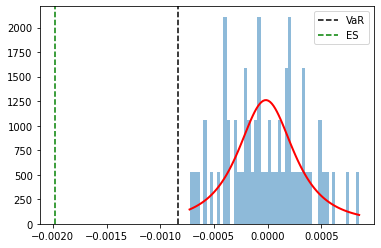

In [14]:
def general_t_ll(mu, s, nu, x):
    td = t(nu)
    log_pdf = td.logpdf((x - mu) / s) - np.log(s)
    return -np.sum(log_pdf)

def fit_general_t(x):
    x = x.to_numpy()
    # Approximate values based on moments
    start_m = np.mean(x)
    start_nu = 6.0 / stats.kurtosis(x) + 4
    start_s = np.sqrt(np.var(x) * (start_nu - 2) / start_nu)

    def _gtl(theta):
        return general_t_ll(*theta, x)

    bounds = ((None, None), (1e-6, None), (2.0001, None))
    result = minimize(_gtl, (start_m, start_s, start_nu), bounds=bounds)

    m, s, nu = result.x
    t_dist_fitted = t(nu, loc=m, scale=s)
    return {'m': m, 's': s, 'nu': nu, 'model': t_dist_fitted}


TDistFitted1 = fit_general_t(Asset_1)
TDistFitted2 = fit_general_t(Asset_2)
TDistFitted3 = fit_general_t(Asset_3)
TDistFitted4 = fit_general_t(Asset_4)

num_simulations = 10000
simulated_value1 = TDistFitted1['model'].rvs(num_simulations)
simulated_value2 = TDistFitted2['model'].rvs(num_simulations)
simulated_value3 = TDistFitted3['model'].rvs(num_simulations)
simulated_value4 = TDistFitted4['model'].rvs(num_simulations)

# # Calculate VaR
# alpha = 0.05 
# var = -TDistFitted['model'].ppf(alpha)
# pdf = TDistFitted['model'].pdf

# # Calculate Expected Shortfall
# def ES_func(x):
#     return x * pdf(x)

# ES, _ = quad(ES_func, -np.inf, var)
# ES = -ES / alpha

# Calculate VaR t dist
alpha = 0.05 
var1 = -TDistFitted1['model'].ppf(alpha)
var2 = -TDistFitted2['model'].ppf(alpha)
var3 = -TDistFitted3['model'].ppf(alpha)
var4 = -TDistFitted4['model'].ppf(alpha)


# Calculate Expected Shortfall
def ES_func_t1(x):
    return x * TDistFitted1['model'].pdf(x) / alpha

ES1, _ = quad(ES_func_t1, -np.inf, var1)

def ES_func_t2(x):
    return x * TDistFitted2['model'].pdf(x) / alpha

ES2, _ = quad(ES_func_t1, -np.inf, var2)

def ES_func_t3(x):
    return x * TDistFitted3['model'].pdf(x) / alpha

ES3, _ = quad(ES_func_t1, -np.inf, var3)

def ES_func_t4(x):
    return x * TDistFitted4['model'].pdf(x) / alpha

ES4, _ = quad(ES_func_t1, -np.inf, var4)


# def calcVaRFittedT(data , alpha = .05):
#     TDistFitted = fit_general_t(data)
#     var = -TDistFitted['model'].ppf(alpha)
#     pdf = TDistFitted['model'].pdf
#     def ES_func_t(x):
#         return x * pdf(x) / alpha
#     ES, _ = quad(ES_func_t, -np.inf, var)
#     ES = -ES / alpha
#     return {"VaR": var, "ES": ES}

# Print the results
print('VaR Asset1: {:.4f}'.format(var1*100))
print('ES Asset1: {:.4f}'.format(-ES1*100))

# Plot the histogram of the data
plt.hist(Asset_1, bins=50, density=True, alpha=0.5)

# Plot the fitted PDF
x = np.linspace(np.min(Asset_1), np.max(Asset_1), 100)
y = TDistFitted1['model'].pdf(x)
plt.plot(x, y, 'r-', lw=2)

# Plot VaR and Expected Shortfall lines
plt.axvline(-var1, color='black', linestyle='--', label='VaR')
plt.axvline(ES1, color='green', linestyle='--', label='ES')

plt.legend()
plt.show()

In [ ]:
portA_returns_df


#reset index

portA_returns_df = portA_returns_df.reset_index()
#drop date

portA_returns_df = portA_returns_df.drop(['Date'], axis=1)

In [ ]:
portADailyPrices



,Price1,Price2
Date,,
2023-03-02,99.370620,103.128269
2023-03-03,99.330886,103.101514
2023-03-04,99.278415,103.060670
2023-03-05,99.309294,103.081667
2023-03-06,99.291473,103.073418
...,...,...
2023-04-27,99.319263,103.092731
2023-04-28,99.322218,103.102812
2023-04-29,99.340590,103.114683


In [ ]:
portfoli

In [15]:
VaRGaussianCopulaA = QRT.calculate_var_Gaussian(portADailyPrices, alpha=.05, num_simulations= 10000)

VaRGaussianCopulaB = QRT.calculate_var_Gaussian(portBDailyPrices,alpha = .05, num_simulations = 10000)

VaRGaussianCopulaC = QRT.calculate_var_Gaussian(portCDailyPrices,alpha = .05, num_simulations = 10000)

In [16]:
VaRGaussianCopulaA

-0.0006934883707577495

In [17]:
VaRGaussianCopulaB

-0.0007326631361172228

In [18]:
VaRGaussianCopulaC

-0.0006963695283525842

In [ ]:
portA_returns_df

,Price1,Price2
0,-0.000400,-0.000259
1,-0.000528,-0.000396
2,0.000311,0.000204
3,-0.000179,-0.000080
4,0.000201,0.000182
5,-0.000009,0.000047
6,-0.000081,-0.000266
7,0.000070,0.000184
8,0.000193,0.000174
9,-0.000191,-0.000175


VaR Asset2: 0.0632
ES Asset2: 0.2367


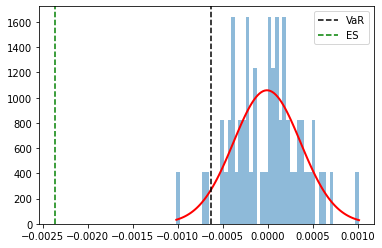

In [ ]:
print('VaR Asset2: {:.4f}'.format(var2*100))
print('ES Asset2: {:.4f}'.format(-ES2*100))

# Plot the histogram of the data
plt.hist(Asset_2, bins=50, density=True, alpha=0.5)

# Plot the fitted PDF
x = np.linspace(np.min(Asset_2), np.max(Asset_2), 100)
y = TDistFitted2['model'].pdf(x)
plt.plot(x, y, 'r-', lw=2)

# Plot VaR and Expected Shortfall lines
plt.axvline(-var2, color='black', linestyle='--', label='VaR')
plt.axvline(ES2, color='green', linestyle='--', label='ES')

plt.legend()
plt.show()

VaR Asset3: 0.0812
ES Asset3: 0.2019


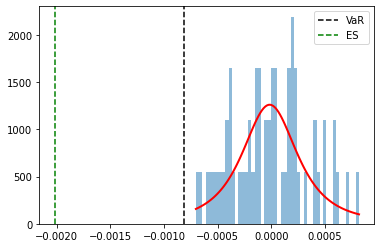

In [ ]:
print('VaR Asset3: {:.4f}'.format(var3*100))
print('ES Asset3: {:.4f}'.format(-ES3*100))

# Plot the histogram of the data
plt.hist(Asset_3, bins=50, density=True, alpha=0.5)

# Plot the fitted PDF
x = np.linspace(np.min(Asset_3), np.max(Asset_3), 100)
y = TDistFitted1['model'].pdf(x)
plt.plot(x, y, 'r-', lw=2)

# Plot VaR and Expected Shortfall lines
plt.axvline(-var3, color='black', linestyle='--', label='VaR')
plt.axvline(ES3, color='green', linestyle='--', label='ES')

plt.legend()
plt.show()

VaR Asset4: 0.0919
ES Asset4: 0.1857


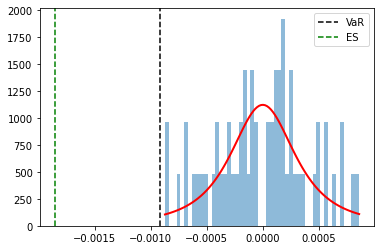

In [ ]:
print('VaR Asset4: {:.4f}'.format(var4*100))
print('ES Asset4: {:.4f}'.format(-ES4*100))

# Plot the histogram of the data
plt.hist(Asset_4, bins=50, density=True, alpha=0.5)

# Plot the fitted PDF
x = np.linspace(np.min(Asset_4), np.max(Asset_4), 100)
y = TDistFitted4['model'].pdf(x)
plt.plot(x, y, 'r-', lw=2)

# Plot VaR and Expected Shortfall lines
plt.axvline(-var4, color='black', linestyle='--', label='VaR')
plt.axvline(ES4, color='green', linestyle='--', label='ES')

plt.legend()
plt.show()

In [ ]:
import numpy as np
from scipy.stats import t

# Fit a t-distribution to the returns of the first asset
params = t.fit(returns.iloc[:, 0])

# Calculate the probability density function (PDF) values for the fitted distribution
x = np.linspace(min(returns.iloc[:, 0]), max(returns.iloc[:, 0]), 100)
pdf_values = t.pdf(x, *params)


In [ ]:
from scipy.stats import norm

# Transform the returns into uniformly distributed variables
uniform_data = portA_returns_df.apply(lambda x: t.cdf(x, *t.fit(x)))

# Transform the uniform variables into normally distributed variables
norm_data = norm.ppf(uniform_data)


In [ ]:
from numpy.random import multivariate_normal

num_simulations = 10000
mean = np.zeros(portA_returns_df.shape[1])
cov_matrix = np.cov(norm_data, rowvar=False)

# Generate random samples from the multivariate normal distribution
gaussian_copula_samples = multivariate_normal(mean, cov_matrix, num_simulations)



In [ ]:
# Transform the Gaussian copula samples back into the original return space
uniform_copula_samples = norm.cdf(gaussian_copula_samples)
t_copula_samples = np.array([t.ppf(uniform_copula_samples[:, i], *t.fit(portA_returns_df.iloc[:, i])) for i in range(portA_returns_df.shape[1])]).T

# Calculate the portfolio returns for each simulation
weights = np.array([1/portA_returns_df.shape[1]] * portA_returns_df.shape[1])  # Equal weights for each asset
portfolio_returns = t_copula_samples @ weights

# Calculate the VaR at a 1% confidence level
VaR_1pct = np.percentile(portfolio_returns, 5)


In [ ]:
VaR_1pct


-0.0006908536268023325

In [ ]:
fit_portA = QRT.returns_fit(portA_returns_df)

fit_portB = QRT.returns_fit(portB_returns_df)

fit_portC = QRT.returns_fit(portC_returns_df)

In [ ]:
portAUmatrix = QRT.UMatrix(portA_returns_df,fit_portA)

portBUmatrix = QRT.UMatrix(portB_returns_df,fit_portB)

portCUmatrix = QRT.UMatrix(portC_returns_df,fit_portC)

In [ ]:
portAcopula = QRT.simulate_multivariate_normal(portA_returns_df,1000)

ValueError: cov must be 2 dimensional and square